In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
root = 'C:/Users/onurt/OneDrive/Masaüstü/ardic/yapay_zeka/train_data/'   #veri setinin dosya yolu

data = pd.read_csv(root + "train.csv")
data.shape

train_data = data[data.usage == "Training"]
train_inputs = train_data.inputs.str.split(" ").tolist()
train_inputs = np.array(train_inputs, dtype=int)
train_outputs = train_data.output.tolist()
train_outputs = np.array(train_outputs, dtype=int)

val_data = data[data.usage == "Validation"]
val_inputs = val_data.inputs.str.split(" ").tolist()
val_inputs = np.array(val_inputs, dtype=int)
val_outputs = val_data.output.tolist()
val_outputs = np.array(val_outputs, dtype=int)

test_data = data[data.usage == "Test"]
test_inputs = test_data.inputs.str.split(" ").tolist()
test_inputs = np.array(test_inputs, dtype=int)
test_outputs = test_data.output.tolist()
test_outputs = np.array(test_outputs, dtype=int)

print(test_inputs)
print(test_outputs)

[[ 7  8]
 [19 38]
 [37 26]
 [89 93]
 [47 69]
 [55 55]
 [ 1  9]
 [ 8 39]
 [44 98]
 [11 17]]
[  56  722  962 8277 3243 3025    9  312 4312  187]


In [3]:
for i in range(train_inputs.shape[0]):   # train veri seti sonuçlarin kontrolu
    a = train_inputs[i,0]
    b = train_inputs[i,1]
    if a*b != train_outputs[i]:
        print(i)


In [4]:
for i in range(val_inputs.shape[0]):   # train veri seti sonuçlarin kontrolu
    a = val_inputs[i,0]
    b = val_inputs[i,1]
    if a*b != val_outputs[i]:
        print(i)

In [5]:
for i in range(test_inputs.shape[0]):   # test veri seti sonuçlarin kontrolu
    a = test_inputs[i,0]
    b = test_inputs[i,1]
    if a*b != test_outputs[i]:
        print(i)


In [6]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import *
from keras import models
import math


In [7]:
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [8]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [9]:
def log(x):
    logx = []
    logy = []
    for i in range(x.shape[0]):
        logx.append([np.log(abs(x[i][0])), np.log(abs(x[i][1]))])
        logy.append([logx[i][0] + logx[i][1]])
    return logx, logy    

In [10]:
x_train, y_train = log(train_inputs)
x_val , y_val = log(val_inputs)


model = Sequential()
model.add(Dense(10, input_dim=2, activation="linear"))
model.add(Dense(1,))

model.compile(optimizer="Adam", loss="mean_squared_error",metrics=[soft_acc,'mean_absolute_error'] )
hist = model.fit(x_train, y_train, epochs=2000, batch_size=10, validation_data=(x_val, y_val))



Epoch 1/2000
3/3 [==============================] - 1s 110ms/step - loss: 33.8754 - soft_acc: 0.0000e+00 - mean_absolute_error: 5.3416 - val_loss: 43.3210 - val_soft_acc: 0.0000e+00 - val_mean_absolute_error: 6.2712
Epoch 2/2000
3/3 [==============================] - 0s 26ms/step - loss: 32.5312 - soft_acc: 0.0000e+00 - mean_absolute_error: 5.2267 - val_loss: 41.6348 - val_soft_acc: 0.0000e+00 - val_mean_absolute_error: 6.1472
Epoch 3/2000
3/3 [==============================] - 0s 29ms/step - loss: 31.1849 - soft_acc: 0.0000e+00 - mean_absolute_error: 5.1102 - val_loss: 39.9801 - val_soft_acc: 0.0000e+00 - val_mean_absolute_error: 6.0230
Epoch 4/2000
3/3 [==============================] - 0s 31ms/step - loss: 29.8418 - soft_acc: 0.0000e+00 - mean_absolute_error: 4.9935 - val_loss: 38.3688 - val_soft_acc: 0.0000e+00 - val_mean_absolute_error: 5.8996
Epoch 5/2000
3/3 [==============================] - 0s 31ms/step - loss: 28.6097 - soft_acc: 0.0000e+00 - mean_absolute_error: 4.8798 - val

Epoch 40/2000
3/3 [==============================] - 0s 25ms/step - loss: 3.7183 - soft_acc: 0.2000 - mean_absolute_error: 1.6220 - val_loss: 5.3520 - val_soft_acc: 0.1000 - val_mean_absolute_error: 2.1675
Epoch 41/2000
3/3 [==============================] - 0s 24ms/step - loss: 3.4484 - soft_acc: 0.2000 - mean_absolute_error: 1.5630 - val_loss: 4.9930 - val_soft_acc: 0.1000 - val_mean_absolute_error: 2.0911
Epoch 42/2000
3/3 [==============================] - 0s 25ms/step - loss: 3.2228 - soft_acc: 0.2000 - mean_absolute_error: 1.5121 - val_loss: 4.6480 - val_soft_acc: 0.1000 - val_mean_absolute_error: 2.0150
Epoch 43/2000
3/3 [==============================] - 0s 25ms/step - loss: 2.9940 - soft_acc: 0.2333 - mean_absolute_error: 1.4561 - val_loss: 4.3235 - val_soft_acc: 0.1000 - val_mean_absolute_error: 1.9407
Epoch 44/2000
3/3 [==============================] - 0s 25ms/step - loss: 2.7752 - soft_acc: 0.2333 - mean_absolute_error: 1.4039 - val_loss: 4.0211 - val_soft_acc: 0.1000 - va

Epoch 80/2000
3/3 [==============================] - 0s 31ms/step - loss: 0.4931 - soft_acc: 0.5667 - mean_absolute_error: 0.5864 - val_loss: 0.3494 - val_soft_acc: 0.5000 - val_mean_absolute_error: 0.5010
Epoch 81/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4836 - soft_acc: 0.5667 - mean_absolute_error: 0.5793 - val_loss: 0.3348 - val_soft_acc: 0.5000 - val_mean_absolute_error: 0.4891
Epoch 82/2000
3/3 [==============================] - 0s 27ms/step - loss: 0.4747 - soft_acc: 0.5667 - mean_absolute_error: 0.5723 - val_loss: 0.3215 - val_soft_acc: 0.5000 - val_mean_absolute_error: 0.4781
Epoch 83/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.4682 - soft_acc: 0.5667 - mean_absolute_error: 0.5667 - val_loss: 0.3083 - val_soft_acc: 0.5000 - val_mean_absolute_error: 0.4669
Epoch 84/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.4604 - soft_acc: 0.5667 - mean_absolute_error: 0.5602 - val_loss: 0.2958 - val_soft_acc: 0.5000 - va

Epoch 120/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.2593 - soft_acc: 0.6667 - mean_absolute_error: 0.4166 - val_loss: 0.1306 - val_soft_acc: 0.7000 - val_mean_absolute_error: 0.3142
Epoch 121/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.2551 - soft_acc: 0.6667 - mean_absolute_error: 0.4134 - val_loss: 0.1287 - val_soft_acc: 0.7000 - val_mean_absolute_error: 0.3124
Epoch 122/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.2504 - soft_acc: 0.6667 - mean_absolute_error: 0.4099 - val_loss: 0.1266 - val_soft_acc: 0.7000 - val_mean_absolute_error: 0.3101
Epoch 123/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.2465 - soft_acc: 0.6667 - mean_absolute_error: 0.4067 - val_loss: 0.1246 - val_soft_acc: 0.7000 - val_mean_absolute_error: 0.3081
Epoch 124/2000
3/3 [==============================] - 0s 27ms/step - loss: 0.2429 - soft_acc: 0.6667 - mean_absolute_error: 0.4039 - val_loss: 0.1226 - val_soft_acc: 0.7000

3/3 [==============================] - 0s 28ms/step - loss: 0.1320 - soft_acc: 0.7333 - mean_absolute_error: 0.3007 - val_loss: 0.0690 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.2358
Epoch 160/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.1293 - soft_acc: 0.7333 - mean_absolute_error: 0.2979 - val_loss: 0.0678 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.2338
Epoch 161/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.1271 - soft_acc: 0.7333 - mean_absolute_error: 0.2955 - val_loss: 0.0668 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.2321
Epoch 162/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.1247 - soft_acc: 0.7333 - mean_absolute_error: 0.2928 - val_loss: 0.0657 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.2301
Epoch 163/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.1227 - soft_acc: 0.7333 - mean_absolute_error: 0.2904 - val_loss: 0.0646 - val_soft_acc: 0.8000 - val_mean_abs

Epoch 199/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0660 - soft_acc: 0.8667 - mean_absolute_error: 0.2155 - val_loss: 0.0420 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.1775
Epoch 200/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0649 - soft_acc: 0.8667 - mean_absolute_error: 0.2139 - val_loss: 0.0416 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.1765
Epoch 201/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.0639 - soft_acc: 0.8667 - mean_absolute_error: 0.2124 - val_loss: 0.0411 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.1750
Epoch 202/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0629 - soft_acc: 0.8667 - mean_absolute_error: 0.2106 - val_loss: 0.0406 - val_soft_acc: 0.8000 - val_mean_absolute_error: 0.1737
Epoch 203/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0619 - soft_acc: 0.8667 - mean_absolute_error: 0.2090 - val_loss: 0.0403 - val_soft_acc: 0.8000

3/3 [==============================] - 0s 24ms/step - loss: 0.0379 - soft_acc: 0.8667 - mean_absolute_error: 0.1662 - val_loss: 0.0325 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1421
Epoch 239/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0374 - soft_acc: 0.8667 - mean_absolute_error: 0.1651 - val_loss: 0.0324 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1414
Epoch 240/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0370 - soft_acc: 0.8667 - mean_absolute_error: 0.1644 - val_loss: 0.0323 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1408
Epoch 241/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0366 - soft_acc: 0.8667 - mean_absolute_error: 0.1637 - val_loss: 0.0321 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1401
Epoch 242/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0362 - soft_acc: 0.8667 - mean_absolute_error: 0.1629 - val_loss: 0.0320 - val_soft_acc: 0.9000 - val_mean_abs

Epoch 278/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0261 - soft_acc: 0.8667 - mean_absolute_error: 0.1391 - val_loss: 0.0292 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1206
Epoch 279/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0259 - soft_acc: 0.8667 - mean_absolute_error: 0.1385 - val_loss: 0.0291 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1200
Epoch 280/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0257 - soft_acc: 0.8667 - mean_absolute_error: 0.1379 - val_loss: 0.0290 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1197
Epoch 281/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0255 - soft_acc: 0.8667 - mean_absolute_error: 0.1373 - val_loss: 0.0290 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1197
Epoch 282/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0254 - soft_acc: 0.8667 - mean_absolute_error: 0.1369 - val_loss: 0.0289 - val_soft_acc: 0.9000

3/3 [==============================] - 0s 32ms/step - loss: 0.0209 - soft_acc: 0.9333 - mean_absolute_error: 0.1217 - val_loss: 0.0269 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1160
Epoch 318/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0208 - soft_acc: 0.9333 - mean_absolute_error: 0.1213 - val_loss: 0.0269 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1159
Epoch 319/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.0207 - soft_acc: 0.9333 - mean_absolute_error: 0.1209 - val_loss: 0.0268 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1157
Epoch 320/2000
3/3 [==============================] - 0s 27ms/step - loss: 0.0206 - soft_acc: 0.9333 - mean_absolute_error: 0.1206 - val_loss: 0.0267 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1155
Epoch 321/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0205 - soft_acc: 0.9333 - mean_absolute_error: 0.1201 - val_loss: 0.0267 - val_soft_acc: 0.9000 - val_mean_abs

Epoch 357/2000
3/3 [==============================] - 0s 27ms/step - loss: 0.0176 - soft_acc: 0.9333 - mean_absolute_error: 0.1108 - val_loss: 0.0243 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1098
Epoch 358/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.0176 - soft_acc: 0.9333 - mean_absolute_error: 0.1106 - val_loss: 0.0242 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1096
Epoch 359/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.0175 - soft_acc: 0.9333 - mean_absolute_error: 0.1103 - val_loss: 0.0242 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1094
Epoch 360/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.0174 - soft_acc: 0.9333 - mean_absolute_error: 0.1101 - val_loss: 0.0241 - val_soft_acc: 0.9000 - val_mean_absolute_error: 0.1092
Epoch 361/2000
3/3 [==============================] - 0s 26ms/step - loss: 0.0173 - soft_acc: 0.9333 - mean_absolute_error: 0.1099 - val_loss: 0.0240 - val_soft_acc: 0.9000

3/3 [==============================] - 0s 25ms/step - loss: 0.0151 - soft_acc: 0.9333 - mean_absolute_error: 0.1024 - val_loss: 0.0214 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.1037
Epoch 397/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0150 - soft_acc: 0.9333 - mean_absolute_error: 0.1021 - val_loss: 0.0214 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.1035
Epoch 398/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0150 - soft_acc: 0.9333 - mean_absolute_error: 0.1018 - val_loss: 0.0213 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.1034
Epoch 399/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0149 - soft_acc: 0.9333 - mean_absolute_error: 0.1018 - val_loss: 0.0212 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.1032
Epoch 400/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0148 - soft_acc: 0.9333 - mean_absolute_error: 0.1015 - val_loss: 0.0211 - val_soft_acc: 1.0000 - val_mean_abs

Epoch 436/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0128 - soft_acc: 0.9333 - mean_absolute_error: 0.0940 - val_loss: 0.0184 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0965
Epoch 437/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0127 - soft_acc: 0.9333 - mean_absolute_error: 0.0938 - val_loss: 0.0183 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0964
Epoch 438/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0127 - soft_acc: 0.9333 - mean_absolute_error: 0.0936 - val_loss: 0.0182 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0962
Epoch 439/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.0126 - soft_acc: 0.9333 - mean_absolute_error: 0.0935 - val_loss: 0.0181 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0959
Epoch 440/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0125 - soft_acc: 0.9333 - mean_absolute_error: 0.0934 - val_loss: 0.0180 - val_soft_acc: 1.0000

3/3 [==============================] - 0s 23ms/step - loss: 0.0107 - soft_acc: 0.9667 - mean_absolute_error: 0.0862 - val_loss: 0.0155 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0888
Epoch 476/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0107 - soft_acc: 0.9667 - mean_absolute_error: 0.0860 - val_loss: 0.0154 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0886
Epoch 477/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0106 - soft_acc: 0.9667 - mean_absolute_error: 0.0858 - val_loss: 0.0153 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0884
Epoch 478/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0106 - soft_acc: 0.9667 - mean_absolute_error: 0.0855 - val_loss: 0.0153 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0882
Epoch 479/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0105 - soft_acc: 0.9667 - mean_absolute_error: 0.0853 - val_loss: 0.0152 - val_soft_acc: 1.0000 - val_mean_abs

Epoch 515/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0088 - soft_acc: 0.9667 - mean_absolute_error: 0.0783 - val_loss: 0.0127 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0807
Epoch 516/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0088 - soft_acc: 0.9667 - mean_absolute_error: 0.0780 - val_loss: 0.0127 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0805
Epoch 517/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0087 - soft_acc: 0.9667 - mean_absolute_error: 0.0778 - val_loss: 0.0126 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0803
Epoch 518/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0087 - soft_acc: 0.9667 - mean_absolute_error: 0.0775 - val_loss: 0.0126 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0801
Epoch 519/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0086 - soft_acc: 0.9667 - mean_absolute_error: 0.0773 - val_loss: 0.0125 - val_soft_acc: 1.0000

3/3 [==============================] - 0s 27ms/step - loss: 0.0072 - soft_acc: 1.0000 - mean_absolute_error: 0.0704 - val_loss: 0.0104 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0730
Epoch 555/2000
3/3 [==============================] - 0s 27ms/step - loss: 0.0072 - soft_acc: 1.0000 - mean_absolute_error: 0.0703 - val_loss: 0.0103 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0727
Epoch 556/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0071 - soft_acc: 1.0000 - mean_absolute_error: 0.0702 - val_loss: 0.0103 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0726
Epoch 557/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0071 - soft_acc: 1.0000 - mean_absolute_error: 0.0700 - val_loss: 0.0102 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0723
Epoch 558/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0070 - soft_acc: 1.0000 - mean_absolute_error: 0.0698 - val_loss: 0.0102 - val_soft_acc: 1.0000 - val_mean_abs

Epoch 594/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0057 - soft_acc: 1.0000 - mean_absolute_error: 0.0628 - val_loss: 0.0083 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0652
Epoch 595/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0057 - soft_acc: 1.0000 - mean_absolute_error: 0.0627 - val_loss: 0.0083 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0650
Epoch 596/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0057 - soft_acc: 1.0000 - mean_absolute_error: 0.0625 - val_loss: 0.0082 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0648
Epoch 597/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0056 - soft_acc: 1.0000 - mean_absolute_error: 0.0623 - val_loss: 0.0082 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0646
Epoch 598/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0056 - soft_acc: 1.0000 - mean_absolute_error: 0.0621 - val_loss: 0.0081 - val_soft_acc: 1.0000

3/3 [==============================] - 0s 29ms/step - loss: 0.0045 - soft_acc: 1.0000 - mean_absolute_error: 0.0558 - val_loss: 0.0065 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0579
Epoch 634/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.0045 - soft_acc: 1.0000 - mean_absolute_error: 0.0556 - val_loss: 0.0065 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0577
Epoch 635/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0045 - soft_acc: 1.0000 - mean_absolute_error: 0.0554 - val_loss: 0.0065 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0575
Epoch 636/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0044 - soft_acc: 1.0000 - mean_absolute_error: 0.0552 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0573
Epoch 637/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0044 - soft_acc: 1.0000 - mean_absolute_error: 0.0552 - val_loss: 0.0064 - val_soft_acc: 1.0000 - val_mean_abs

Epoch 673/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0035 - soft_acc: 1.0000 - mean_absolute_error: 0.0490 - val_loss: 0.0050 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0508
Epoch 674/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.0035 - soft_acc: 1.0000 - mean_absolute_error: 0.0488 - val_loss: 0.0050 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0506
Epoch 675/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.0034 - soft_acc: 1.0000 - mean_absolute_error: 0.0488 - val_loss: 0.0050 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0504
Epoch 676/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0034 - soft_acc: 1.0000 - mean_absolute_error: 0.0486 - val_loss: 0.0049 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0503
Epoch 677/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0034 - soft_acc: 1.0000 - mean_absolute_error: 0.0484 - val_loss: 0.0049 - val_soft_acc: 1.0000

3/3 [==============================] - 0s 27ms/step - loss: 0.0026 - soft_acc: 1.0000 - mean_absolute_error: 0.0426 - val_loss: 0.0038 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0443
Epoch 713/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0026 - soft_acc: 1.0000 - mean_absolute_error: 0.0424 - val_loss: 0.0038 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0441
Epoch 714/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0026 - soft_acc: 1.0000 - mean_absolute_error: 0.0422 - val_loss: 0.0038 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0440
Epoch 715/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0026 - soft_acc: 1.0000 - mean_absolute_error: 0.0421 - val_loss: 0.0037 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0438
Epoch 716/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0026 - soft_acc: 1.0000 - mean_absolute_error: 0.0420 - val_loss: 0.0037 - val_soft_acc: 1.0000 - val_mean_abs

Epoch 752/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0019 - soft_acc: 1.0000 - mean_absolute_error: 0.0366 - val_loss: 0.0028 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0381
Epoch 753/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.0019 - soft_acc: 1.0000 - mean_absolute_error: 0.0365 - val_loss: 0.0028 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0379
Epoch 754/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.0019 - soft_acc: 1.0000 - mean_absolute_error: 0.0363 - val_loss: 0.0028 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0378
Epoch 755/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0019 - soft_acc: 1.0000 - mean_absolute_error: 0.0362 - val_loss: 0.0028 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0376
Epoch 756/2000
3/3 [==============================] - 0s 28ms/step - loss: 0.0019 - soft_acc: 1.0000 - mean_absolute_error: 0.0361 - val_loss: 0.0027 - val_soft_acc: 1.0000

3/3 [==============================] - 0s 23ms/step - loss: 0.0014 - soft_acc: 1.0000 - mean_absolute_error: 0.0314 - val_loss: 0.0021 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0325
Epoch 792/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0014 - soft_acc: 1.0000 - mean_absolute_error: 0.0313 - val_loss: 0.0020 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0324
Epoch 793/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0014 - soft_acc: 1.0000 - mean_absolute_error: 0.0311 - val_loss: 0.0020 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0323
Epoch 794/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0014 - soft_acc: 1.0000 - mean_absolute_error: 0.0309 - val_loss: 0.0020 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0321
Epoch 795/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0014 - soft_acc: 1.0000 - mean_absolute_error: 0.0308 - val_loss: 0.0020 - val_soft_acc: 1.0000 - val_mean_abs

Epoch 831/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0010 - soft_acc: 1.0000 - mean_absolute_error: 0.0264 - val_loss: 0.0015 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0273
Epoch 832/2000
3/3 [==============================] - 0s 24ms/step - loss: 9.9669e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0262 - val_loss: 0.0014 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0272
Epoch 833/2000
3/3 [==============================] - 0s 26ms/step - loss: 9.8649e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0261 - val_loss: 0.0014 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0271
Epoch 834/2000
3/3 [==============================] - 0s 25ms/step - loss: 9.7791e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0260 - val_loss: 0.0014 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0270
Epoch 835/2000
3/3 [==============================] - 0s 26ms/step - loss: 9.6977e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0259 - val_loss: 0.0014 - val_

Epoch 870/2000
3/3 [==============================] - 0s 22ms/step - loss: 7.0067e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0219 - val_loss: 0.0010 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0228
Epoch 871/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.9386e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0218 - val_loss: 0.0010 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0227
Epoch 872/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.8595e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0217 - val_loss: 9.9741e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0226
Epoch 873/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.8039e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0216 - val_loss: 9.8809e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0225
Epoch 874/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.7367e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0215 - val_loss: 9

3/3 [==============================] - 0s 24ms/step - loss: 4.8053e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0182 - val_loss: 6.9761e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0189
Epoch 909/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.7624e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0181 - val_loss: 6.9132e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0188
Epoch 910/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.7137e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0180 - val_loss: 6.8337e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0187
Epoch 911/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.6644e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0179 - val_loss: 6.7625e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0186
Epoch 912/2000
3/3 [==============================] - 0s 24ms/step - loss: 4.6177e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0178 - val_loss: 6.6926e-

3/3 [==============================] - 0s 23ms/step - loss: 3.2192e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0149 - val_loss: 4.6667e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0155
Epoch 947/2000
3/3 [==============================] - 0s 23ms/step - loss: 3.1885e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0148 - val_loss: 4.6243e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0154
Epoch 948/2000
3/3 [==============================] - 0s 21ms/step - loss: 3.1508e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0147 - val_loss: 4.5720e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0153
Epoch 949/2000
3/3 [==============================] - 0s 23ms/step - loss: 3.1156e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0146 - val_loss: 4.5204e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0152
Epoch 950/2000
3/3 [==============================] - 0s 22ms/step - loss: 3.0868e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0146 - val_loss: 4.4702e-

3/3 [==============================] - 0s 23ms/step - loss: 2.1053e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0120 - val_loss: 3.0503e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0125
Epoch 985/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.0779e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0119 - val_loss: 3.0199e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0124
Epoch 986/2000
3/3 [==============================] - 0s 24ms/step - loss: 2.0511e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0118 - val_loss: 2.9873e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0124
Epoch 987/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.0301e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0118 - val_loss: 2.9484e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0123
Epoch 988/2000
3/3 [==============================] - 0s 22ms/step - loss: 2.0033e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0117 - val_loss: 2.9131e-

3/3 [==============================] - 0s 27ms/step - loss: 1.3378e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0096 - val_loss: 1.9348e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0100
Epoch 1023/2000
3/3 [==============================] - 0s 31ms/step - loss: 1.3167e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0095 - val_loss: 1.9118e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0099
Epoch 1024/2000
3/3 [==============================] - 0s 23ms/step - loss: 1.3027e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0094 - val_loss: 1.8850e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0098
Epoch 1025/2000
3/3 [==============================] - 0s 25ms/step - loss: 1.2866e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0094 - val_loss: 1.8616e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0098
Epoch 1026/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.2700e-04 - soft_acc: 1.0000 - mean_absolute_error: 0.0094 - val_loss: 1.84

3/3 [==============================] - 0s 23ms/step - loss: 8.2143e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0075 - val_loss: 1.1903e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0078
Epoch 1061/2000
3/3 [==============================] - 0s 27ms/step - loss: 8.1141e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0075 - val_loss: 1.1748e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0078
Epoch 1062/2000
3/3 [==============================] - 0s 33ms/step - loss: 8.0083e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0074 - val_loss: 1.1602e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0077
Epoch 1063/2000
3/3 [==============================] - 0s 21ms/step - loss: 7.8900e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0074 - val_loss: 1.1448e-04 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0077
Epoch 1064/2000
3/3 [==============================] - 0s 23ms/step - loss: 7.8013e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0073 - val_loss: 1.12

3/3 [==============================] - 0s 24ms/step - loss: 4.9186e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0058 - val_loss: 7.1051e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0060
Epoch 1099/2000
3/3 [==============================] - 0s 24ms/step - loss: 4.8455e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0058 - val_loss: 7.0146e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0060
Epoch 1100/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.7698e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0057 - val_loss: 6.9306e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0060
Epoch 1101/2000
3/3 [==============================] - 0s 31ms/step - loss: 4.7126e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0057 - val_loss: 6.8336e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0059
Epoch 1102/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.6490e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0057 - val_loss: 6.72

3/3 [==============================] - 0s 23ms/step - loss: 2.8416e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0044 - val_loss: 4.1112e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0046
Epoch 1137/2000
3/3 [==============================] - 0s 25ms/step - loss: 2.8017e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0044 - val_loss: 4.0475e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0046
Epoch 1138/2000
3/3 [==============================] - 0s 26ms/step - loss: 2.7651e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0044 - val_loss: 3.9928e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0045
Epoch 1139/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.7139e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0043 - val_loss: 3.9344e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0045
Epoch 1140/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.6795e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0043 - val_loss: 3.87

3/3 [==============================] - 0s 27ms/step - loss: 1.5966e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0033 - val_loss: 2.2932e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0034
Epoch 1175/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.5635e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0033 - val_loss: 2.2580e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0034
Epoch 1176/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.5405e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0033 - val_loss: 2.2213e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0034
Epoch 1177/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.5136e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0032 - val_loss: 2.1855e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0034
Epoch 1178/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.4958e-05 - soft_acc: 1.0000 - mean_absolute_error: 0.0032 - val_loss: 2.14

3/3 [==============================] - 0s 23ms/step - loss: 8.5634e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0024 - val_loss: 1.2324e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0025
Epoch 1213/2000
3/3 [==============================] - 0s 23ms/step - loss: 8.4221e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0024 - val_loss: 1.2131e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0025
Epoch 1214/2000
3/3 [==============================] - 0s 25ms/step - loss: 8.2754e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0024 - val_loss: 1.1917e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0025
Epoch 1215/2000
3/3 [==============================] - 0s 30ms/step - loss: 8.1456e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0024 - val_loss: 1.1730e-05 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0025
Epoch 1216/2000
3/3 [==============================] - 0s 29ms/step - loss: 8.0224e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0024 - val_loss: 1.15

3/3 [==============================] - 0s 22ms/step - loss: 4.4563e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0018 - val_loss: 6.3885e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0018
Epoch 1251/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.3717e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0017 - val_loss: 6.2675e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0018
Epoch 1252/2000
3/3 [==============================] - 0s 24ms/step - loss: 4.2854e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0017 - val_loss: 6.1639e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0018
Epoch 1253/2000
3/3 [==============================] - 0s 26ms/step - loss: 4.2064e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0017 - val_loss: 6.0619e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0018
Epoch 1254/2000
3/3 [==============================] - 0s 26ms/step - loss: 4.1308e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0017 - val_loss: 5.96

3/3 [==============================] - 0s 25ms/step - loss: 2.2111e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0012 - val_loss: 3.1905e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0013
Epoch 1289/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.1640e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0012 - val_loss: 3.1277e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0013
Epoch 1290/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.1286e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0012 - val_loss: 3.0659e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0013
Epoch 1291/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.0880e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0012 - val_loss: 3.0108e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 0.0012
Epoch 1292/2000
3/3 [==============================] - 0s 25ms/step - loss: 2.0484e-06 - soft_acc: 1.0000 - mean_absolute_error: 0.0012 - val_loss: 2.95

3/3 [==============================] - 0s 25ms/step - loss: 1.0724e-06 - soft_acc: 1.0000 - mean_absolute_error: 8.5723e-04 - val_loss: 1.5458e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.9043e-04
Epoch 1326/2000
3/3 [==============================] - 0s 27ms/step - loss: 1.0519e-06 - soft_acc: 1.0000 - mean_absolute_error: 8.4867e-04 - val_loss: 1.5206e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8304e-04
Epoch 1327/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.0313e-06 - soft_acc: 1.0000 - mean_absolute_error: 8.3730e-04 - val_loss: 1.4936e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.7472e-04
Epoch 1328/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.0117e-06 - soft_acc: 1.0000 - mean_absolute_error: 8.3067e-04 - val_loss: 1.4593e-06 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.6619e-04
Epoch 1329/2000
3/3 [==============================] - 0s 22ms/step - loss: 9.8849e-07 - soft_acc: 1.0000 - mean_absolut

Epoch 1362/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.9982e-07 - soft_acc: 1.0000 - mean_absolute_error: 5.8334e-04 - val_loss: 7.2102e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.0810e-04
Epoch 1363/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.9052e-07 - soft_acc: 1.0000 - mean_absolute_error: 5.8085e-04 - val_loss: 7.0368e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.0147e-04
Epoch 1364/2000
3/3 [==============================] - 0s 22ms/step - loss: 4.7863e-07 - soft_acc: 1.0000 - mean_absolute_error: 5.7390e-04 - val_loss: 6.8890e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 5.9457e-04
Epoch 1365/2000
3/3 [==============================] - 0s 22ms/step - loss: 4.6986e-07 - soft_acc: 1.0000 - mean_absolute_error: 5.6882e-04 - val_loss: 6.7231e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 5.8753e-04
Epoch 1366/2000
3/3 [==============================] - 0s 24ms/step - loss: 4.5768e-07 - soft_acc: 1.000

3/3 [==============================] - 0s 25ms/step - loss: 2.2830e-07 - soft_acc: 1.0000 - mean_absolute_error: 3.9796e-04 - val_loss: 3.2486e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 4.0866e-04
Epoch 1399/2000
3/3 [==============================] - 0s 24ms/step - loss: 2.2182e-07 - soft_acc: 1.0000 - mean_absolute_error: 3.9284e-04 - val_loss: 3.1805e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 4.0410e-04
Epoch 1400/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.1687e-07 - soft_acc: 1.0000 - mean_absolute_error: 3.8671e-04 - val_loss: 3.1289e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 4.0063e-04
Epoch 1401/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.1211e-07 - soft_acc: 1.0000 - mean_absolute_error: 3.7957e-04 - val_loss: 3.0523e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.9551e-04
Epoch 1402/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.0710e-07 - soft_acc: 1.0000 - mean_absolut

Epoch 1435/2000
3/3 [==============================] - 0s 23ms/step - loss: 9.5712e-08 - soft_acc: 1.0000 - mean_absolute_error: 2.5704e-04 - val_loss: 1.3779e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.6608e-04
Epoch 1436/2000
3/3 [==============================] - 0s 23ms/step - loss: 9.3834e-08 - soft_acc: 1.0000 - mean_absolute_error: 2.5525e-04 - val_loss: 1.3429e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.6261e-04
Epoch 1437/2000
3/3 [==============================] - 0s 23ms/step - loss: 9.2595e-08 - soft_acc: 1.0000 - mean_absolute_error: 2.5607e-04 - val_loss: 1.3075e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.5922e-04
Epoch 1438/2000
3/3 [==============================] - 0s 23ms/step - loss: 8.9553e-08 - soft_acc: 1.0000 - mean_absolute_error: 2.5126e-04 - val_loss: 1.2786e-07 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.5635e-04
Epoch 1439/2000
3/3 [==============================] - 0s 24ms/step - loss: 8.7124e-08 - soft_acc: 1.000

3/3 [==============================] - 0s 27ms/step - loss: 3.9731e-08 - soft_acc: 1.0000 - mean_absolute_error: 1.6566e-04 - val_loss: 5.6765e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.7077e-04
Epoch 1472/2000
3/3 [==============================] - 0s 26ms/step - loss: 3.8564e-08 - soft_acc: 1.0000 - mean_absolute_error: 1.6322e-04 - val_loss: 5.5429e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.6890e-04
Epoch 1473/2000
3/3 [==============================] - 0s 27ms/step - loss: 3.7534e-08 - soft_acc: 1.0000 - mean_absolute_error: 1.6081e-04 - val_loss: 5.4090e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.6673e-04
Epoch 1474/2000
3/3 [==============================] - 0s 27ms/step - loss: 3.6732e-08 - soft_acc: 1.0000 - mean_absolute_error: 1.5874e-04 - val_loss: 5.2663e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.6428e-04
Epoch 1475/2000
3/3 [==============================] - 0s 26ms/step - loss: 3.5810e-08 - soft_acc: 1.0000 - mean_absolut

Epoch 1508/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.5049e-08 - soft_acc: 1.0000 - mean_absolute_error: 1.0246e-04 - val_loss: 2.1581e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0538e-04
Epoch 1509/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.4683e-08 - soft_acc: 1.0000 - mean_absolute_error: 1.0094e-04 - val_loss: 2.1043e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0389e-04
Epoch 1510/2000
3/3 [==============================] - 0s 23ms/step - loss: 1.4245e-08 - soft_acc: 1.0000 - mean_absolute_error: 9.8832e-05 - val_loss: 2.0483e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0240e-04
Epoch 1511/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.3876e-08 - soft_acc: 1.0000 - mean_absolute_error: 9.7450e-05 - val_loss: 2.0011e-08 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0130e-04
Epoch 1512/2000
3/3 [==============================] - 0s 23ms/step - loss: 1.3541e-08 - soft_acc: 1.000

3/3 [==============================] - 0s 23ms/step - loss: 5.5816e-09 - soft_acc: 1.0000 - mean_absolute_error: 6.2788e-05 - val_loss: 7.9586e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.4039e-05
Epoch 1545/2000
3/3 [==============================] - 0s 23ms/step - loss: 5.4291e-09 - soft_acc: 1.0000 - mean_absolute_error: 6.1576e-05 - val_loss: 7.7528e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.3002e-05
Epoch 1546/2000
3/3 [==============================] - 0s 23ms/step - loss: 5.2661e-09 - soft_acc: 1.0000 - mean_absolute_error: 6.0268e-05 - val_loss: 7.5362e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.2323e-05
Epoch 1547/2000
3/3 [==============================] - 0s 23ms/step - loss: 5.1428e-09 - soft_acc: 1.0000 - mean_absolute_error: 5.9191e-05 - val_loss: 7.3811e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.1595e-05
Epoch 1548/2000
3/3 [==============================] - 0s 23ms/step - loss: 4.9497e-09 - soft_acc: 1.0000 - mean_absolut

Epoch 1581/2000
3/3 [==============================] - 0s 23ms/step - loss: 1.9133e-09 - soft_acc: 1.0000 - mean_absolute_error: 3.6490e-05 - val_loss: 2.7275e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.7467e-05
Epoch 1582/2000
3/3 [==============================] - 0s 26ms/step - loss: 1.8440e-09 - soft_acc: 1.0000 - mean_absolute_error: 3.5806e-05 - val_loss: 2.6544e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.6967e-05
Epoch 1583/2000
3/3 [==============================] - 0s 25ms/step - loss: 1.7979e-09 - soft_acc: 1.0000 - mean_absolute_error: 3.5318e-05 - val_loss: 2.5757e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.6430e-05
Epoch 1584/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.7586e-09 - soft_acc: 1.0000 - mean_absolute_error: 3.4904e-05 - val_loss: 2.4918e-09 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.5644e-05
Epoch 1585/2000
3/3 [==============================] - 0s 26ms/step - loss: 1.6941e-09 - soft_acc: 1.000

3/3 [==============================] - 0s 22ms/step - loss: 6.4433e-10 - soft_acc: 1.0000 - mean_absolute_error: 2.1275e-05 - val_loss: 9.2019e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.1756e-05
Epoch 1618/2000
3/3 [==============================] - 0s 26ms/step - loss: 6.2213e-10 - soft_acc: 1.0000 - mean_absolute_error: 2.0897e-05 - val_loss: 8.9083e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.1338e-05
Epoch 1619/2000
3/3 [==============================] - 0s 37ms/step - loss: 6.0081e-10 - soft_acc: 1.0000 - mean_absolute_error: 2.0452e-05 - val_loss: 8.6130e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.0969e-05
Epoch 1620/2000
3/3 [==============================] - 0s 28ms/step - loss: 5.9458e-10 - soft_acc: 1.0000 - mean_absolute_error: 2.0405e-05 - val_loss: 8.4046e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.0790e-05
Epoch 1621/2000
3/3 [==============================] - 0s 23ms/step - loss: 5.7264e-10 - soft_acc: 1.0000 - mean_absolut

Epoch 1654/2000
3/3 [==============================] - 0s 21ms/step - loss: 2.0223e-10 - soft_acc: 1.0000 - mean_absolute_error: 1.1877e-05 - val_loss: 2.8733e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.2064e-05
Epoch 1655/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.9831e-10 - soft_acc: 1.0000 - mean_absolute_error: 1.1706e-05 - val_loss: 2.8114e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.2016e-05
Epoch 1656/2000
3/3 [==============================] - 0s 22ms/step - loss: 1.9317e-10 - soft_acc: 1.0000 - mean_absolute_error: 1.1563e-05 - val_loss: 2.7088e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.1754e-05
Epoch 1657/2000
3/3 [==============================] - 0s 24ms/step - loss: 1.8922e-10 - soft_acc: 1.0000 - mean_absolute_error: 1.1496e-05 - val_loss: 2.6253e-10 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.1659e-05
Epoch 1658/2000
3/3 [==============================] - 0s 26ms/step - loss: 1.8305e-10 - soft_acc: 1.000

3/3 [==============================] - 0s 23ms/step - loss: 6.8585e-11 - soft_acc: 1.0000 - mean_absolute_error: 7.0810e-06 - val_loss: 9.5707e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.9857e-06
Epoch 1691/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.5630e-11 - soft_acc: 1.0000 - mean_absolute_error: 6.8426e-06 - val_loss: 9.1974e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.8307e-06
Epoch 1692/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.3447e-11 - soft_acc: 1.0000 - mean_absolute_error: 6.6082e-06 - val_loss: 9.0024e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.7830e-06
Epoch 1693/2000
3/3 [==============================] - 0s 26ms/step - loss: 6.1355e-11 - soft_acc: 1.0000 - mean_absolute_error: 6.4452e-06 - val_loss: 8.7438e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 6.7115e-06
Epoch 1694/2000
3/3 [==============================] - 0s 27ms/step - loss: 6.0688e-11 - soft_acc: 1.0000 - mean_absolut

Epoch 1727/2000
3/3 [==============================] - 0s 26ms/step - loss: 2.2682e-11 - soft_acc: 1.0000 - mean_absolute_error: 4.0929e-06 - val_loss: 3.2384e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 4.1246e-06
Epoch 1728/2000
3/3 [==============================] - 0s 25ms/step - loss: 2.2582e-11 - soft_acc: 1.0000 - mean_absolute_error: 4.0174e-06 - val_loss: 3.2334e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 4.1604e-06
Epoch 1729/2000
3/3 [==============================] - 0s 27ms/step - loss: 2.1849e-11 - soft_acc: 1.0000 - mean_absolute_error: 3.9458e-06 - val_loss: 3.0430e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.9220e-06
Epoch 1730/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.0718e-11 - soft_acc: 1.0000 - mean_absolute_error: 3.7233e-06 - val_loss: 2.8422e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 3.8147e-06
Epoch 1731/2000
3/3 [==============================] - 0s 26ms/step - loss: 1.9623e-11 - soft_acc: 1.000

3/3 [==============================] - 0s 24ms/step - loss: 8.5857e-12 - soft_acc: 1.0000 - mean_absolute_error: 2.3723e-06 - val_loss: 1.2450e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.6107e-06
Epoch 1764/2000
3/3 [==============================] - 0s 29ms/step - loss: 8.5061e-12 - soft_acc: 1.0000 - mean_absolute_error: 2.3643e-06 - val_loss: 1.2336e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.5630e-06
Epoch 1765/2000
3/3 [==============================] - 0s 33ms/step - loss: 8.3944e-12 - soft_acc: 1.0000 - mean_absolute_error: 2.3723e-06 - val_loss: 1.1808e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.5630e-06
Epoch 1766/2000
3/3 [==============================] - 0s 29ms/step - loss: 7.9756e-12 - soft_acc: 1.0000 - mean_absolute_error: 2.3166e-06 - val_loss: 1.1080e-11 - val_soft_acc: 1.0000 - val_mean_absolute_error: 2.4199e-06
Epoch 1767/2000
3/3 [==============================] - 0s 26ms/step - loss: 7.6990e-12 - soft_acc: 1.0000 - mean_absolut

Epoch 1800/2000
3/3 [==============================] - 0s 23ms/step - loss: 3.3429e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.4981e-06 - val_loss: 5.0491e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.7047e-06
Epoch 1801/2000
3/3 [==============================] - 0s 22ms/step - loss: 3.2761e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.4702e-06 - val_loss: 4.9852e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.6451e-06
Epoch 1802/2000
3/3 [==============================] - 0s 23ms/step - loss: 3.2723e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.4861e-06 - val_loss: 4.9397e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.6451e-06
Epoch 1803/2000
3/3 [==============================] - 0s 22ms/step - loss: 3.0984e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.4504e-06 - val_loss: 4.9170e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.5974e-06
Epoch 1804/2000
3/3 [==============================] - 0s 22ms/step - loss: 3.2197e-12 - soft_acc: 1.000

3/3 [==============================] - 0s 26ms/step - loss: 2.3708e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.2755e-06 - val_loss: 2.9004e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.2279e-06
Epoch 1837/2000
3/3 [==============================] - 0s 28ms/step - loss: 2.0847e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.1722e-06 - val_loss: 2.8024e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.2159e-06
Epoch 1838/2000
3/3 [==============================] - 0s 27ms/step - loss: 2.1359e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.1802e-06 - val_loss: 3.2117e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.4067e-06
Epoch 1839/2000
3/3 [==============================] - 0s 23ms/step - loss: 2.4239e-12 - soft_acc: 1.0000 - mean_absolute_error: 1.3232e-06 - val_loss: 3.2117e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.4067e-06
Epoch 1840/2000
3/3 [==============================] - 0s 21ms/step - loss: 2.3614e-12 - soft_acc: 1.0000 - mean_absolut

Epoch 1873/2000
3/3 [==============================] - 0s 29ms/step - loss: 1.2927e-12 - soft_acc: 1.0000 - mean_absolute_error: 8.5433e-07 - val_loss: 1.9782e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0967e-06
Epoch 1874/2000
3/3 [==============================] - 0s 23ms/step - loss: 1.2927e-12 - soft_acc: 1.0000 - mean_absolute_error: 8.5433e-07 - val_loss: 1.9782e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0967e-06
Epoch 1875/2000
3/3 [==============================] - 0s 30ms/step - loss: 1.2752e-12 - soft_acc: 1.0000 - mean_absolute_error: 8.5036e-07 - val_loss: 1.8417e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 1.0014e-06
Epoch 1876/2000
3/3 [==============================] - 0s 27ms/step - loss: 1.2581e-12 - soft_acc: 1.0000 - mean_absolute_error: 8.2652e-07 - val_loss: 1.7735e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 9.5367e-07
Epoch 1877/2000
3/3 [==============================] - 0s 27ms/step - loss: 1.1733e-12 - soft_acc: 1.000

3/3 [==============================] - 0s 27ms/step - loss: 9.5307e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.9141e-07 - val_loss: 1.2562e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1910/2000
3/3 [==============================] - 0s 26ms/step - loss: 9.7581e-13 - soft_acc: 1.0000 - mean_absolute_error: 7.3910e-07 - val_loss: 1.1937e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.5831e-07
Epoch 1911/2000
3/3 [==============================] - 0s 27ms/step - loss: 9.9097e-13 - soft_acc: 1.0000 - mean_absolute_error: 7.7089e-07 - val_loss: 1.1937e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.5831e-07
Epoch 1912/2000
3/3 [==============================] - 0s 27ms/step - loss: 9.8339e-13 - soft_acc: 1.0000 - mean_absolute_error: 7.5499e-07 - val_loss: 1.1937e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.5831e-07
Epoch 1913/2000
3/3 [==============================] - 0s 25ms/step - loss: 9.8339e-13 - soft_acc: 1.0000 - mean_absolut

Epoch 1946/2000
3/3 [==============================] - 0s 31ms/step - loss: 8.4176e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.7155e-07 - val_loss: 1.0971e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1947/2000
3/3 [==============================] - 0s 27ms/step - loss: 8.4176e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.7155e-07 - val_loss: 1.0971e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1948/2000
3/3 [==============================] - 0s 23ms/step - loss: 8.4176e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.7155e-07 - val_loss: 1.0971e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1949/2000
3/3 [==============================] - 0s 23ms/step - loss: 8.4176e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.7155e-07 - val_loss: 1.0971e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1950/2000
3/3 [==============================] - 0s 22ms/step - loss: 8.4176e-13 - soft_acc: 1.000

3/3 [==============================] - 0s 24ms/step - loss: 6.4659e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.1591e-07 - val_loss: 1.0516e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1983/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.4659e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.1591e-07 - val_loss: 1.0516e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1984/2000
3/3 [==============================] - 0s 25ms/step - loss: 6.4659e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.1591e-07 - val_loss: 1.0516e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1985/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.4659e-13 - soft_acc: 1.0000 - mean_absolute_error: 6.1591e-07 - val_loss: 1.0516e-12 - val_soft_acc: 1.0000 - val_mean_absolute_error: 8.8215e-07
Epoch 1986/2000
3/3 [==============================] - 0s 23ms/step - loss: 6.7265e-13 - soft_acc: 1.0000 - mean_absolut

In [14]:
x_test, y_test = log(test_inputs)                 #test

results = model.predict(x_test, batch_size=2)
x_test = np.array(x_test)

for i in range(x_test.shape[0]):
    sign = 1
    if test_inputs[i][0] < 0 :       #isareti negatif olan girdilerin kontrolu
        sign = -1*sign
    if test_inputs[i][1] < 0 :
        sign = -1*sign
    print(test_inputs[i][0]*test_inputs[i][1], ' == '  , sign*math.exp(results[i]))

5/5 [==============================] - 0s 2ms/step
56  ==  56.00007079128849
722  ==  722.0002809022955
962  ==  962.0002783302361
8277  ==  8276.996715008521
3243  ==  3242.997421329279
3025  ==  3025.000565212439
9  ==  9.000021814712133
312  ==  312.00020511054015
4312  ==  4312.002925903686
187  ==  187.00027659624232


In [15]:
#     dizideki degerler ile test
x = np.array([[-11, 2342]])         

x_test, _ = log(x)              

results = model.predict(x_test)

sign = 1
if x[0][0] < 0 :       #isareti negatif olan girdilerin kontrolu
    sign = -1*sign
if x[0][1] < 0 :
    sign = -1*sign
print(x[0][0]*x[0][1], ' == '  , sign*math.exp(results))

1/1 [==============================] - 0s 44ms/step
-25762  ==  -25762.011549178187


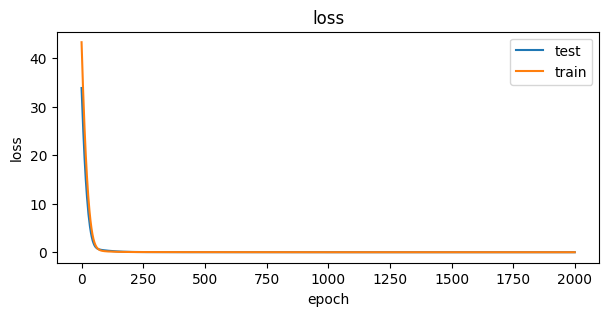

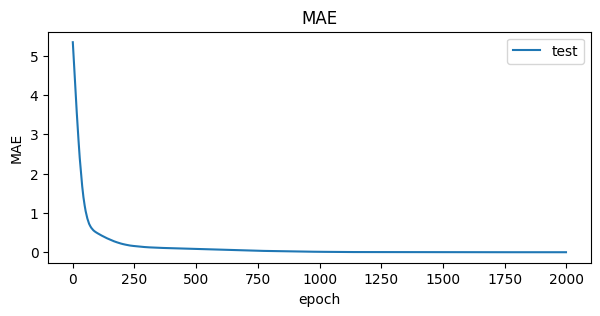

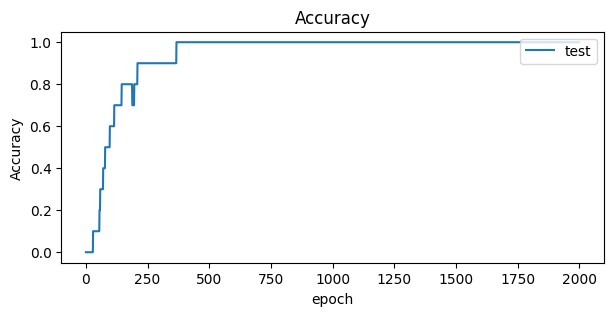

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

plt.figure(figsize=(7,3))
plt.plot(hist.history['mean_absolute_error'])
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

plt.figure(figsize=(7,3))
plt.plot(hist.history['val_soft_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()